▪ Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para
filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada
de Fourier.
1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una
imagen para validar el funcionamiento en el dominio espectral.
2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency
Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.
3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of
focus measure operators in shape-from-focus”

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
from scipy.signal import convolve2d
from scipy.ndimage import zoom
import matplotlib.pyplot as plt

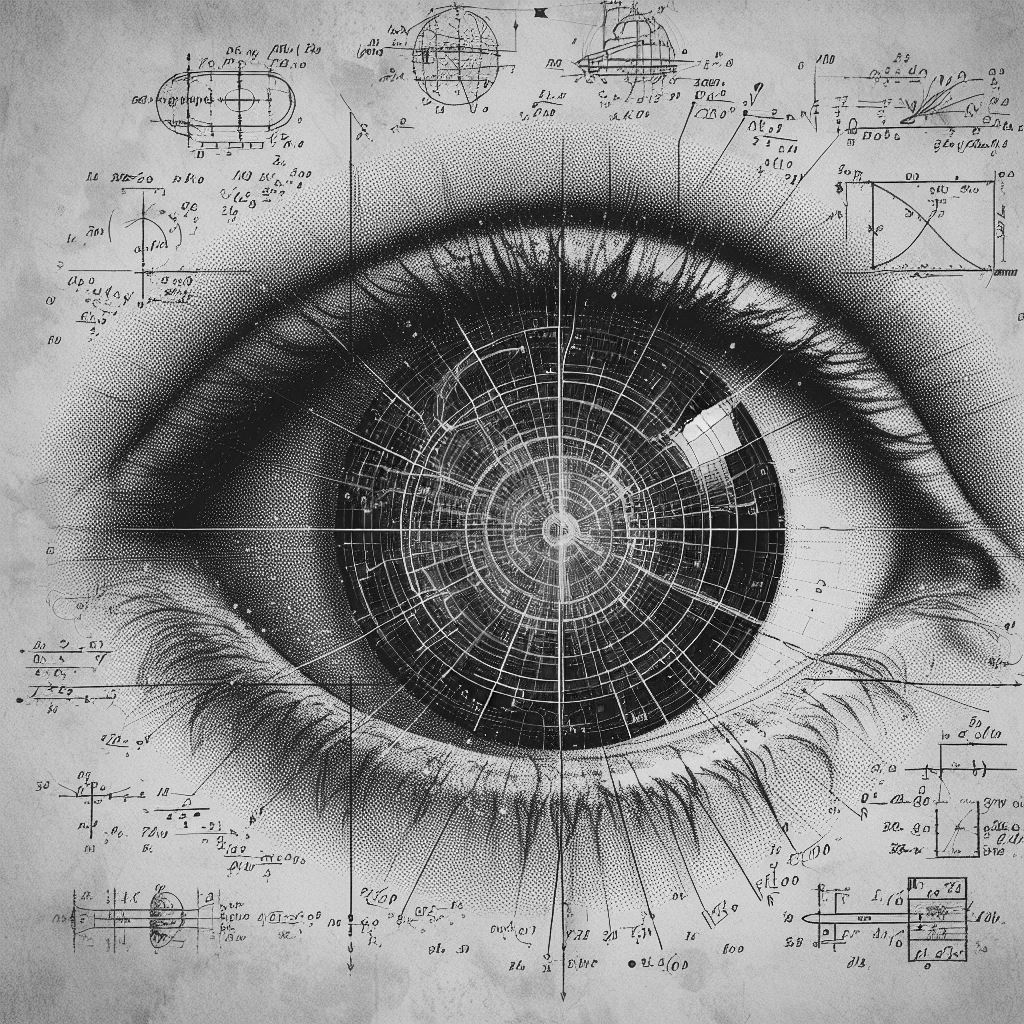

(1024, 1024)


In [2]:
img = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP2/Material/Eye.jpg', cv.IMREAD_GRAYSCALE)
cv2_imshow(img)
print(img.shape)

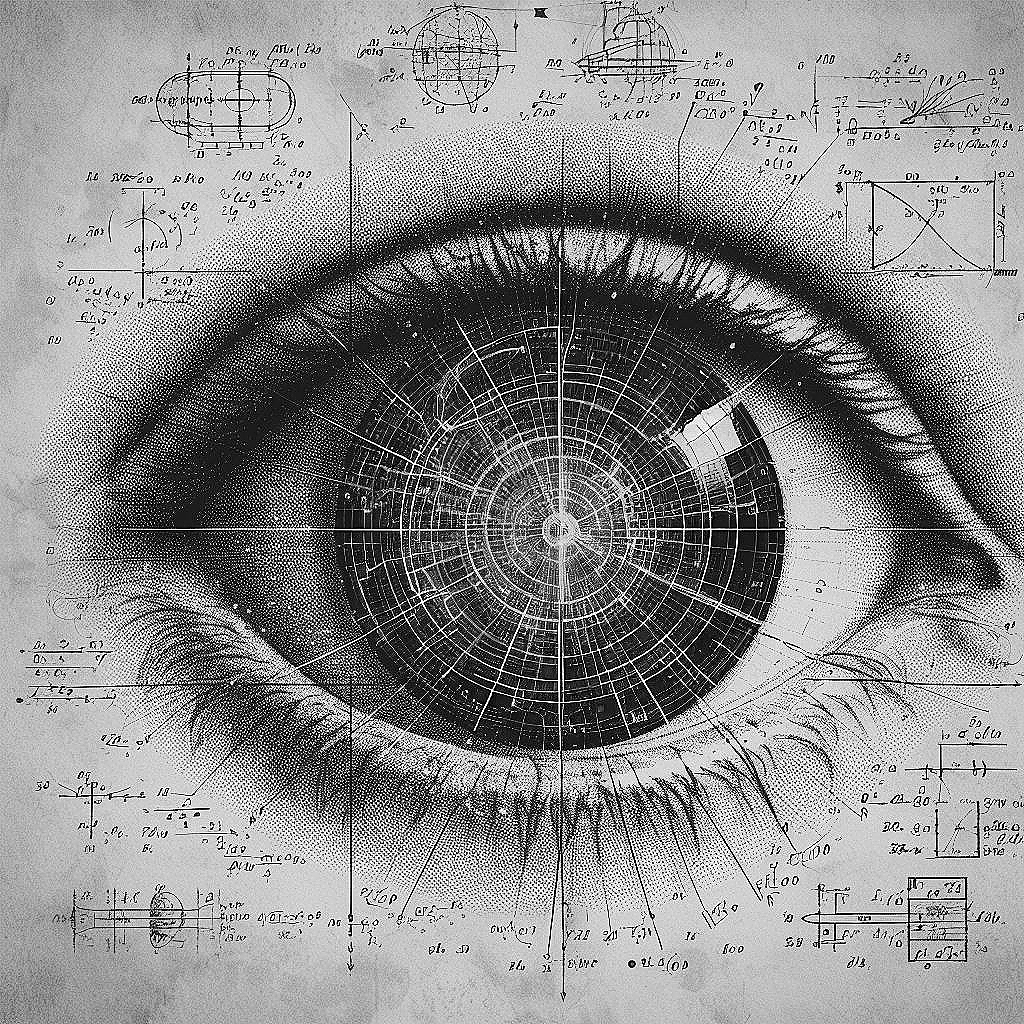

In [3]:
#Vamos a subirle el enfoque.
k=5
gauss = cv.GaussianBlur(img, (7,7), 0.5)
img_sharp = cv.addWeighted(img, k+1, gauss, -k, 0)
cv2_imshow(img_sharp)

In [4]:
k,w = img.shape

In [5]:
#Generamos la funcion que nos entregara un Kernel gausiano y su tranformada de fourier

def create_gauss_filter(h, w, ksize, sigma):
  #Generamos el Kernel Gaussiano
  Kx = cv.getGaussianKernel(ksize=ksize, sigma=sigma)
  Ky = cv.getGaussianKernel(ksize=ksize, sigma=sigma)
  K = Kx * Ky.T

  # Crear la matriz de ceros
  KM = np.zeros((h, w), dtype=np.float32)

  # Calcular las coordenadas para colocar el kernel centrado
  start_x = (w - ksize) // 2
  start_y = (h - ksize) // 2
  end_x = start_x + ksize
  end_y = start_y + ksize

  # Colocar el kernel centrado en la matriz de ceros
  KM[start_y:end_y, start_x:end_x] = K

  #Obtenemos la transformada de fourier del kernel.

  k_fft = np.fft.fft2(KM)

  return K, k_fft

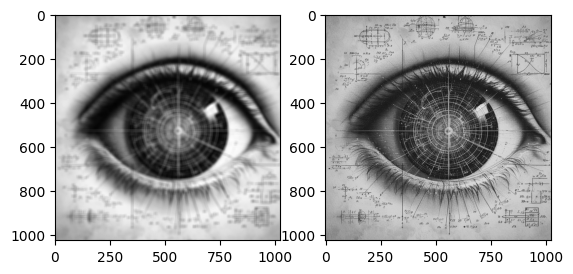

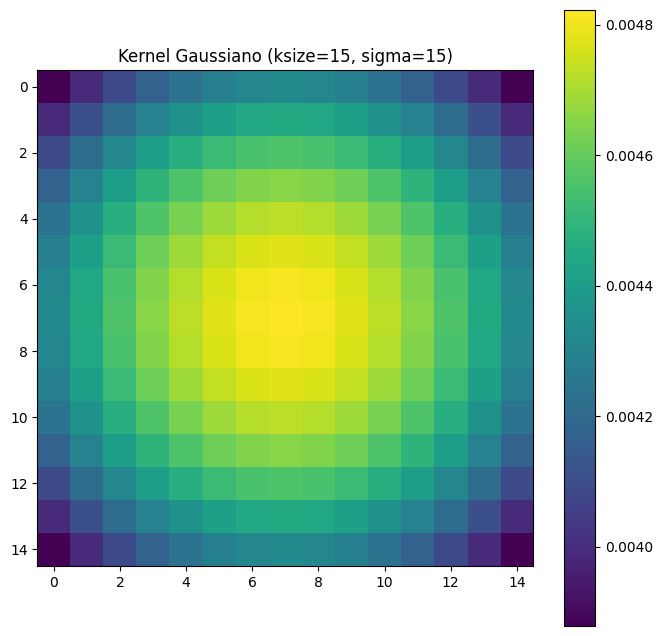

In [6]:
h,w = img.shape
k = 15
s = 15
Kernel, KernelFFT = create_gauss_filter(h, w, k, s)

img_fft = np.fft.fft2(img)
filtered = img_fft * KernelFFT

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_gauss,'gray')
axarr[1].imshow(img,'gray')

#axarr[1,1].imshow(image_datas[3])

plt.figure(figsize=(8,8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

plt.imshow(Kernel, cmap='viridis', interpolation='nearest')
plt.title(f'Kernel Gaussiano (ksize={k}, sigma={s})')
plt.colorbar()
plt.show()

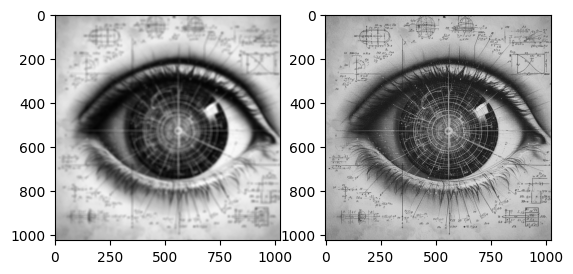

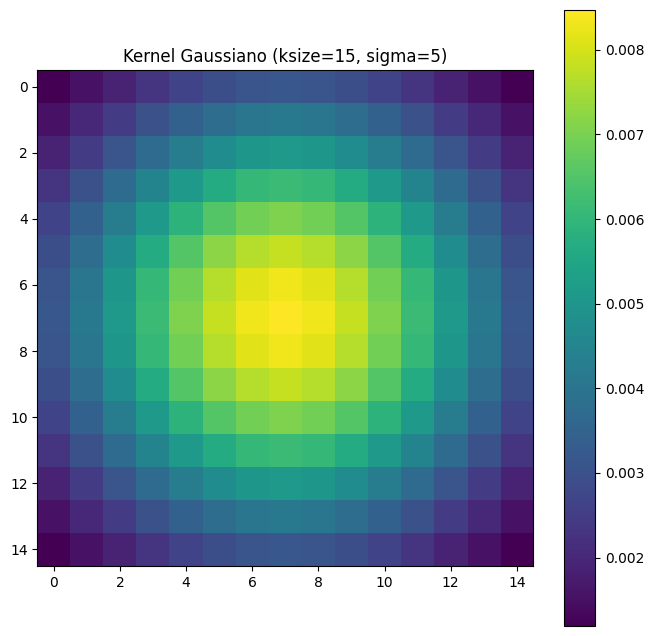

In [7]:
h,w = img.shape
k = 15
s = 5
Kernel, KernelFFT = create_gauss_filter(h, w, k, s)

img_fft = np.fft.fft2(img)
filtered = img_fft * KernelFFT

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_gauss,'gray')
axarr[1].imshow(img,'gray')

#axarr[1,1].imshow(image_datas[3])

plt.figure(figsize=(8,8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

plt.imshow(Kernel, cmap='viridis', interpolation='nearest')
plt.title(f'Kernel Gaussiano (ksize={k}, sigma={s})')
plt.colorbar()
plt.show()

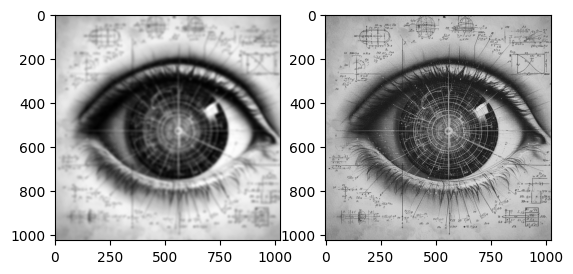

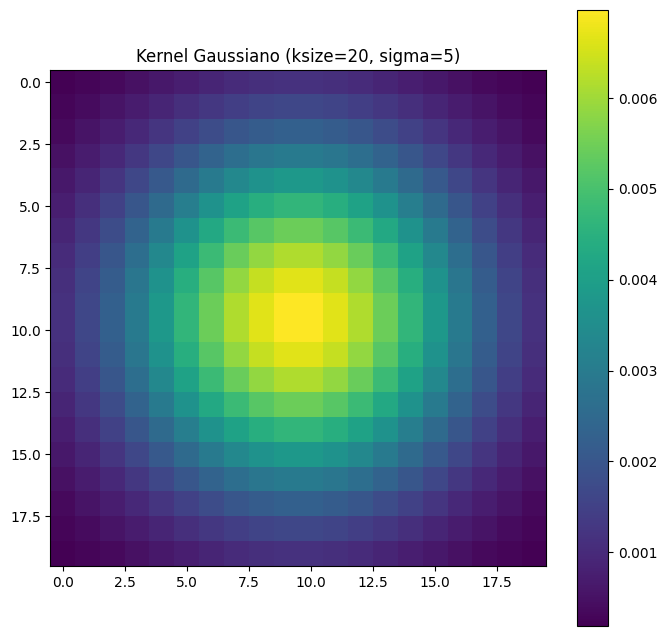

In [8]:
h,w = img.shape
k = 20
s = 5
Kernel, KernelFFT = create_gauss_filter(h, w, k, s)

img_fft = np.fft.fft2(img)
filtered = img_fft * KernelFFT

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_gauss,'gray')
axarr[1].imshow(img,'gray')

#axarr[1,1].imshow(image_datas[3])

plt.figure(figsize=(8,8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

plt.imshow(Kernel, cmap='viridis', interpolation='nearest')
plt.title(f'Kernel Gaussiano (ksize={k}, sigma={s})')
plt.colorbar()
plt.show()

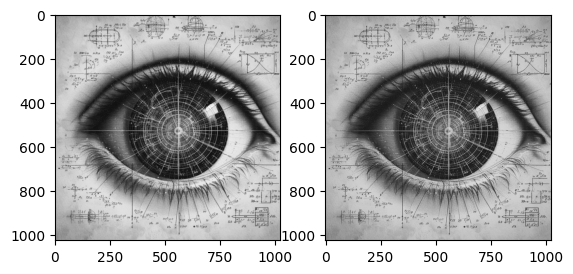

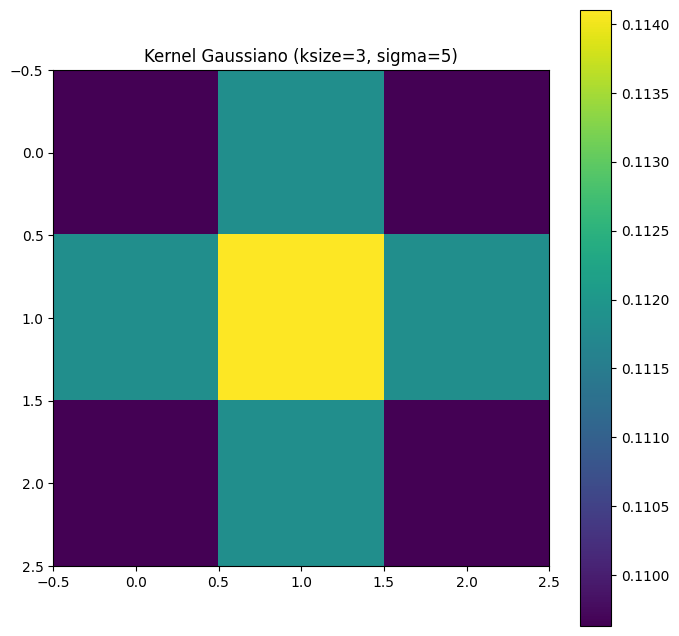

In [9]:
h,w = img.shape
k = 3
s = 5
Kernel, KernelFFT = create_gauss_filter(h, w, k, s)

img_fft = np.fft.fft2(img)
filtered = img_fft * KernelFFT

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_gauss,'gray')
axarr[1].imshow(img,'gray')

#axarr[1,1].imshow(image_datas[3])

plt.figure(figsize=(8,8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

plt.imshow(Kernel, cmap='viridis', interpolation='nearest')
plt.title(f'Kernel Gaussiano (ksize={k}, sigma={s})')
plt.colorbar()
plt.show()



---


# **Punto 2**

Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency
Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.

En el paper de "Image Sharpness Measure for Blurred Images in Frequency" se propone un metodo para medir la calidad de una imagen basandonos en el calculo de sharpness o blurriness de la misma en el dominio de las frecuencias.
Para esto los autores proponen el siguiente algoritmo:

**Input:** Una imagen (I) de tamaño NxM

**Output:** Medida de Calidad de Imagen ***(FM)*** donde FM significa Frequency Domain Image Blur Measure

* Paso 1: Computar F que es la transforamda de Fourier de la imagen I
* Paso 2: Hallar Fc que se obtiene desplazando el origen de F al centro
* Paso 3: Caluclar AF = abs(Fc). AF es el valor absoluto de la transformada de Fourier centrada de la imagen I
* Paso 4: Calcular M = max(AF) que es el maximo valor de los componentes de frecuencia en F
* Paso 5: Calcular Th = Al numero total de pixeles en F cuyos valores son mayores a un threshold, donde thres = M / 1000
* Paso 6: calular FM con la siguiente ecuacion:
#**FM = Th / M x N**

---







In [10]:
#Adquirimos la imagen I a procesar
input = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP2/Material/Lena.jpg',0)
input_b = cv.GaussianBlur(input, ksize=(103, 103), sigmaX=23)

#Armamos una funcion para calcular el FM de las imagenes:
def FM_Cal(input):

    #Obtenemos Fc (la transformada de fourier centrada en el origen)
    Fc = np.fft.fftshift(np.fft.fft2(input))

    #Calculo el valor absoluto de Fc
    AF = np.abs(Fc)

    #Calculo el maximo valor de los componentes de AF
    M = np.max(AF)

    #Calculo el numero total de coeficientes mayores a M/1000

    Th = AF[AF > M / 1000].size

    #Ahora con todos los componentes calculo FM

    FM = Th / input.size

    return(FM,Th)

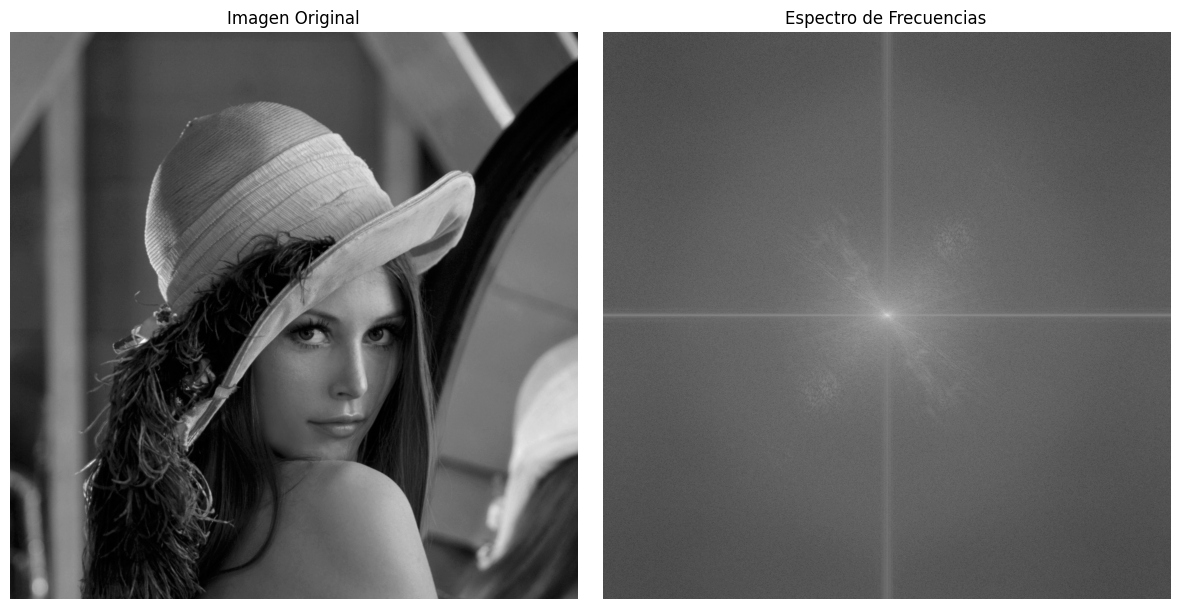

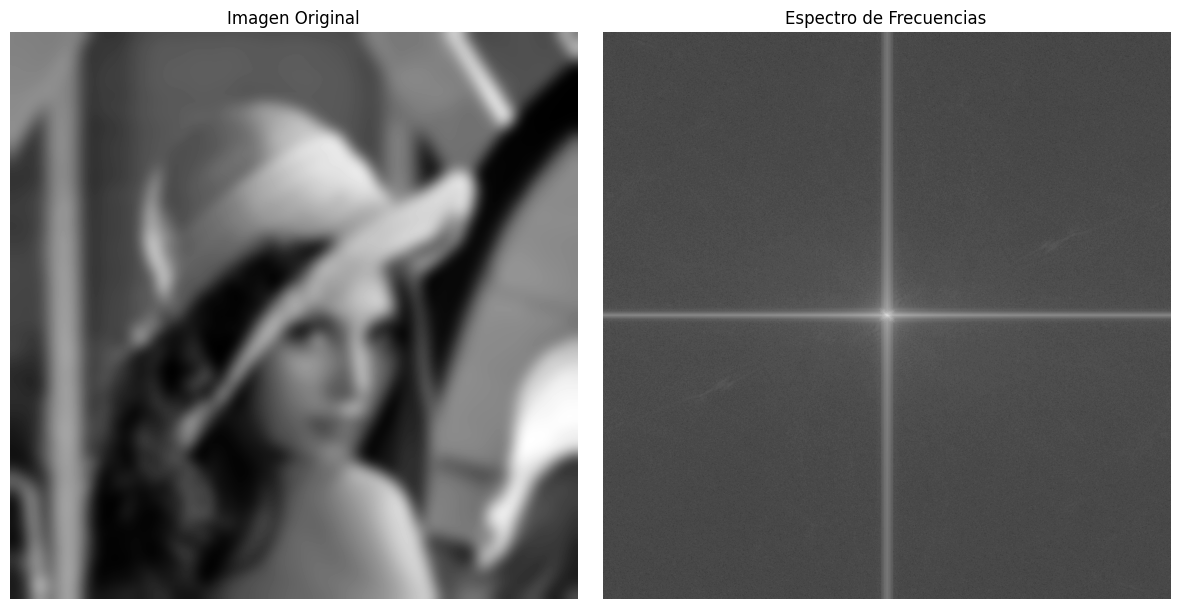

In [11]:
transformada_fourier = np.fft.fft2(input)
espectro = np.fft.fftshift(np.abs(transformada_fourier))
espectro_log = np.log(espectro + 1)

# Mostrar la imagen original y el espectro de frecuencias
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(input, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(espectro_log, cmap='gray')
plt.title('Espectro de Frecuencias')
plt.axis('off')

plt.tight_layout()
plt.show()

transformada_fourier = np.fft.fft2(input_b)
espectro = np.fft.fftshift(np.abs(transformada_fourier))
espectro_log = np.log(espectro + 1)

# Mostrar la imagen original y el espectro de frecuencias
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(input_b, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(espectro_log, cmap='gray')
plt.title('Espectro de Frecuencias')
plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
FM, Th = FM_Cal(input)

print('FM para imagen sin blures ', FM, 'El numero total de pixeles que superan el threshold para esta imagen es', Th)

FMb, Thb = FM_Cal(input_b)

print('FM para imagen con blur es', FMb, 'El numero total de pixeles que superan el threshold para esta imagen es', Thb)

FM para imagen sin blures  0.0015100478967097044 El numero total de pixeles que superan el threshold para esta imagen es 5801
FM para imagen con blur es 0.00048547480216576427 El numero total de pixeles que superan el threshold para esta imagen es 1865


Primero realice esta prueba que es basicamente tratar de replicar lo expuesto en el paper para confirmar que los calculos esten bien hechos. Aqui podemos observar que los valores de pixeles que superan el threshold son bastante similares a los del paper, pero los valores de FM, si bien su relacion se mantiene, ambos estan un orden de magnitud por debajo de lo que dice el documento, para la imagen sin blur esperaria tener valores de 0.014 y obtengo 0.0015, un cero mas por delante de los digitos significativos. No se a que pueda deberse esto, pero voy a tenerlo en cuenta ya que representan un error en el calculo.

De todas maneras la implementacion de las ecuaciones es correcta ya que pude constatarlo con el repositorio oficial de los autores y lo hacen de la misma manera que yo. Lo que me deja a pensar que quiza es el tamaño de la imagen lo que esta afectando el resultado.

**Comparacion**
Ahora vamos a probar haciendo una comparacion de resultados entre una imagen con blur por metodo de convolucion y una por metodo espectral. Para el metodo por convolucion utilizaremos el ya utilizado GaussianBlur de CV y para el espectral vamos a utilizar la funcion que realizamos mas arriba.

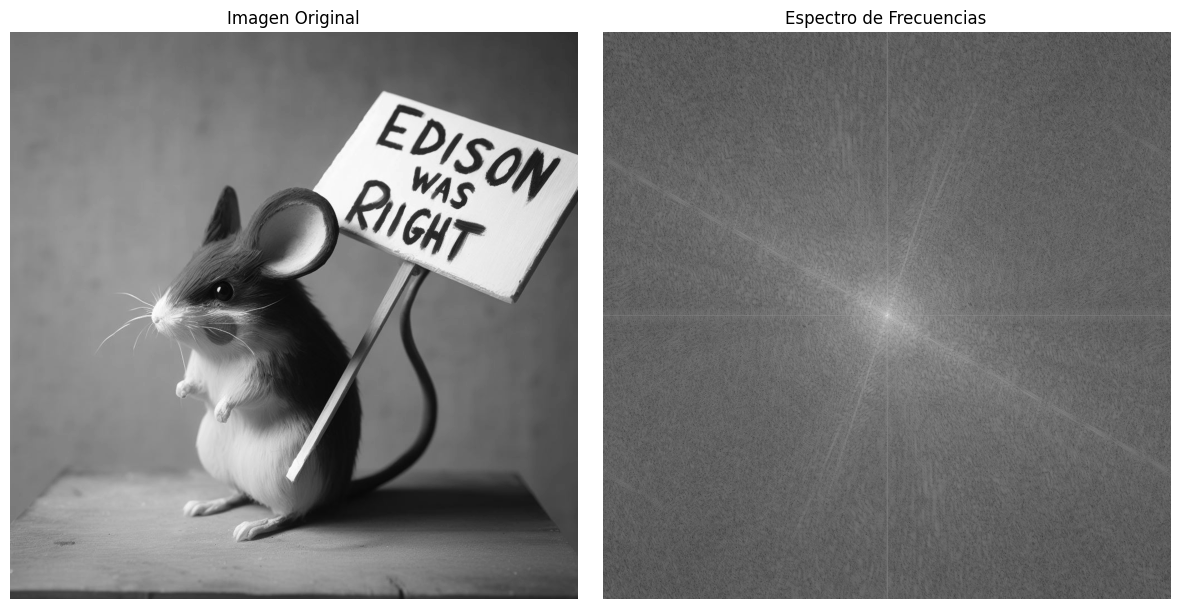

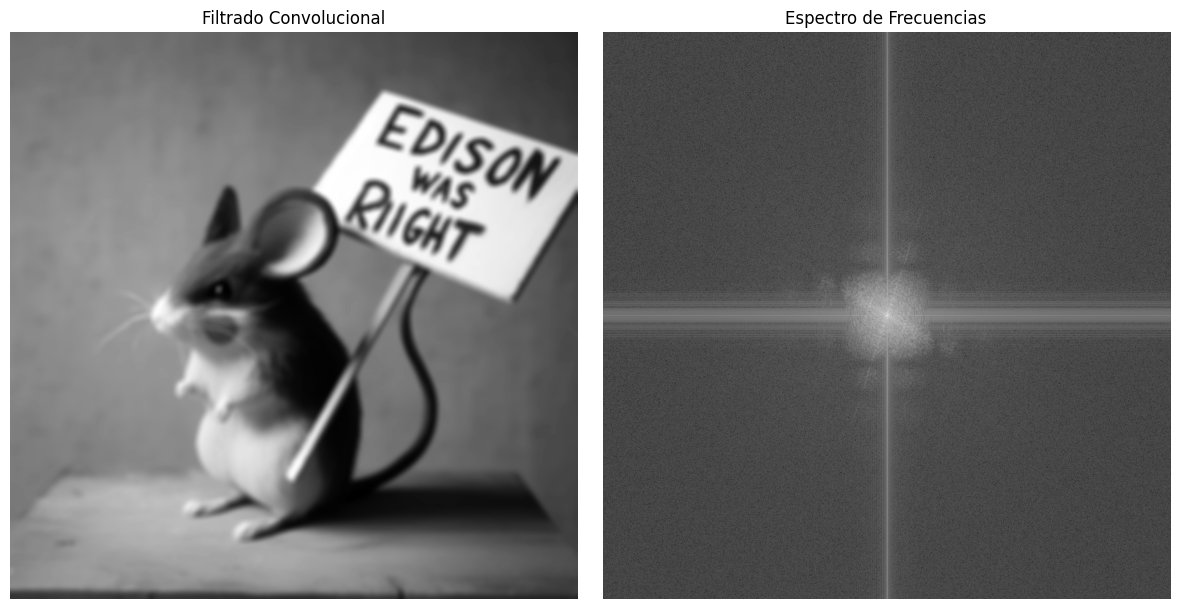

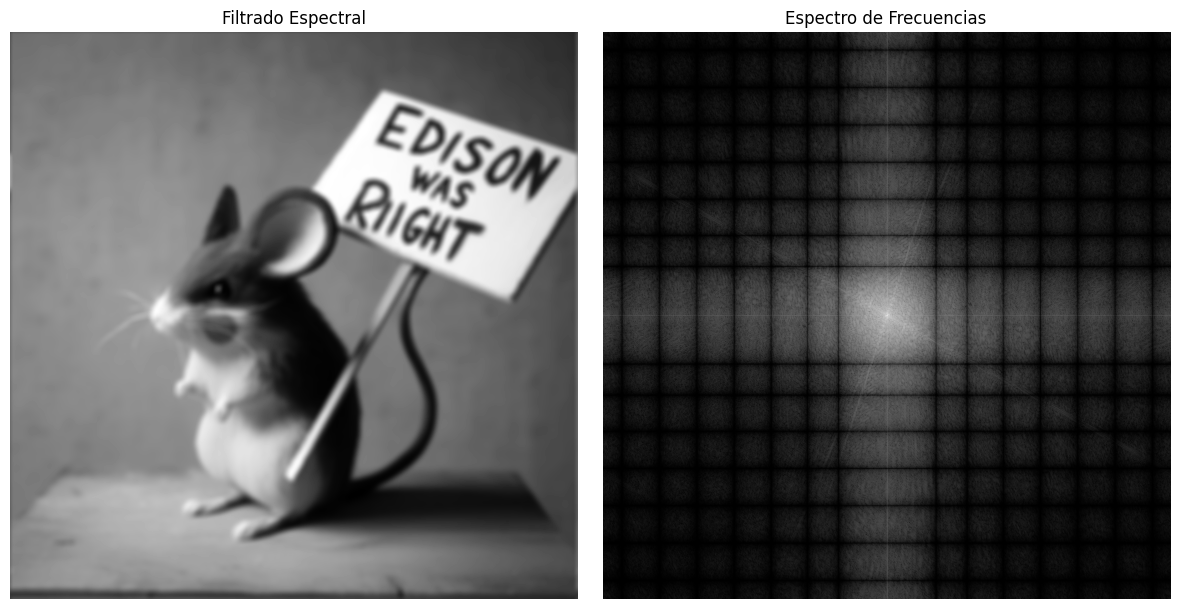

In [13]:
k = 15
s = 5
img = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP2/Material/Rat.jpg',0)
h,w = img.shape

#Aplicamos el filtro convolucional
img_conv = cv.GaussianBlur(img,(k,k),s)

#Aplicamos el filtro espectral
Kernel, KernelFFT = create_gauss_filter(h, w, k, s)
img_fft = np.fft.fft2(img)
filtered = img_fft * KernelFFT
img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

#Graficamos


#calculo fourier img original
transformada_fourier = np.fft.fft2(img)
espectro = np.fft.fftshift(np.abs(transformada_fourier))
espectro_log = np.log(espectro + 1)

# Mostrar la imagen original y el espectro de frecuencias
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(espectro_log, cmap='gray')
plt.title('Espectro de Frecuencias')
plt.axis('off')

plt.tight_layout()
plt.show()


#calculo fourier convolucional
transformada_fourier = np.fft.fft2(img_conv)
espectro = np.fft.fftshift(np.abs(transformada_fourier))
espectro_log = np.log(espectro + 1)

# Mostrar la imagen filtrada con el filtro convolucional y el espectro de frecuencias
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_conv, cmap='gray')
plt.title('Filtrado Convolucional')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(espectro_log, cmap='gray')
plt.title('Espectro de Frecuencias')
plt.axis('off')

plt.tight_layout()
plt.show()

#calculo fourier espectral
transformada_fourier = np.fft.fft2(img_gauss)
espectro = np.fft.fftshift(np.abs(transformada_fourier))
espectro_log = np.log(espectro + 1)

# Mostrar la imagen filtrada espectralmente y el espectro de frecuencias
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_gauss, cmap='gray')
plt.title('Filtrado Espectral')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(espectro_log, cmap='gray')
plt.title('Espectro de Frecuencias')
plt.axis('off')

plt.tight_layout()
plt.show()



In [14]:
FMc, Thc = FM_Cal(img_conv)

print('El FM para la imagen con filtrado convolucional es:', FMc, 'El numero total de pixeles que superan el threshold para esta imagen es:', Thc)

FMe, The = FM_Cal(img_gauss)

print('El FM para imagen con filtrado espectral es:', FMe, 'El numero total de pixeles que superan el threshold para esta imagen es:', The)

El FM para la imagen con filtrado convolucional es: 0.003931999206542969 El numero total de pixeles que superan el threshold para esta imagen es: 4123
El FM para imagen con filtrado espectral es: 0.0038557052612304688 El numero total de pixeles que superan el threshold para esta imagen es: 4043


Ahora vamos a realizar un analisis grafico de calidad en base a un kernel estatico y un sigma variante. Utilizaremos un valor de sigma que vaya desde 0 hasta 20 para tener una grafica amplia y lo graficaremos como eje x, el eje y correspondera a los valores de la metrica FM.  

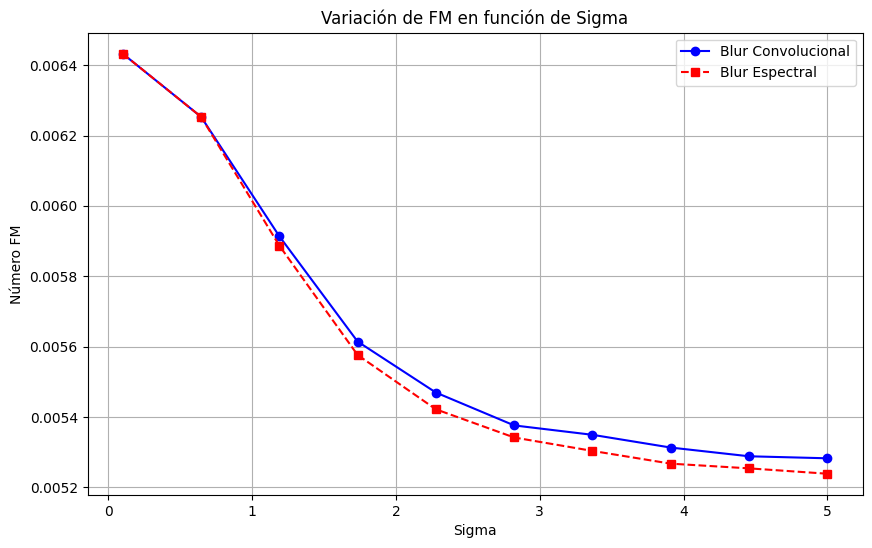

In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Importamos la imagen
img = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP2/Material/Rat.jpg',0)
h,w = img.shape

# Hacemos una lista de los valores de sigma a probar
sigmas = np.linspace(0.1, 5, 10)
k = 7
# Lista para almacenar los valores de FM
fm_val_conv = []
fm_val_esp = []

#iteramos para cada sigma
for sigma in sigmas:

    # Aplicar filtro covolucional
    blur_conv = cv.GaussianBlur(img, (k,k), sigma)

    #Aplicamos el filtro espectral
    Kernel, KernelFFT = create_gauss_filter(h, w, k, sigma)
    img_fft = np.fft.fft2(img)
    filtered = img_fft * KernelFFT
    blur_espectral = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

    # Calcular el número FM para el blur convolucional
    fm_conv, _ = FM_Cal(blur_conv)
    fm_val_conv.append(fm_conv)

    # Calcular el número FM para el blur espectral
    fm_esp, _ = FM_Cal(blur_espectral)
    fm_val_esp.append(fm_esp)


# Crear la gráfica con Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(sigmas, fm_val_conv, label='Blur Convolucional', marker='o', linestyle='-', color='b')
plt.plot(sigmas, fm_val_esp, label='Blur Espectral', marker='s', linestyle='--', color='r')
plt.title('Variación de FM en función de Sigma')
plt.xlabel('Sigma')
plt.ylabel('Número FM')
plt.legend()
plt.grid(True)
plt.show()

Siguiendo como ejemplo al paper graficamos unos 10 valores entre 0 y 5 para los FM de dos imagenes blurreadas con metodos diferentes. En la practica lo hice con 0.1 como numero inicial porque al hacerlo con 0 obtenia una lectura que no me parecia un resultado coherente.

En esta grafica podemos observar con que velocidad ambos metodos tienden a la reduccion de la nitidez de la imagen y se hace evidente que el metodo espectral tiene a blurrear la imagen con mayor eficiencia, pero la diferencia no es amplia.

Esta diferencia se mantiene durante toda la extension y ambas curvas se observan paralelas a medida que mas sigmas se grafican.

El comportamiento de ambas curvas es el esperado en consecuencia a una disminucion de los valores de calidad a medidad que el desenfoque de la imagen aumenta. No obstante los valores que calculo con mi interpretacion de las ecuaciones no tienen la misma variabilidad que se observa en el documento. Esto me hace pensar que quiza mi aplicacion este errada.



---
# **Punto 3**
Ahora vamos a repetir esta comparacion, pero en vez de utilizar el metodo de FM vamos a usar uno de los enumerados en el apendice del paper **"Analysis Of Focus Measure Operators"**
El metodo que elegi es el llamado "Histogram Entropy (STA7)" formula (A.36) en el documento.
En este metodo se busca utilizar la información del contenido de la imagen para calcular la medida de foco. La entropía del histograma se utiliza como una medida de la nitidez de la imagen.

In [52]:
import cv2
import numpy as np

def sta7(image):
    # Convierte la imagen a escala de grises si no lo está.
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calcula el histograma de la imagen.
    hist, _ = np.histogram(image.ravel(),256,[0,256])

    # Normaliza el histograma.
    hist = hist / hist.sum()

    # Calcula la entropía del histograma como la medida de foco STA7.
    entropy = -np.sum(hist * np.log2(hist + 1e-10))  # Agregamos un pequeño valor para evitar logaritmo de cero.

    return entropy


7.548057122111618
7.525634267069545


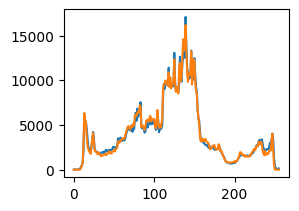

In [53]:

img = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP2/Material/Rat.jpg',0)
h,w = img.shape


sigma = 5
k = 7

#Filtro espectral
Kernel, KernelFFT = create_gauss_filter(h, w, k, sigma)
img_fft = np.fft.fft2(img)
filtered = img_fft * KernelFFT
blur_espectral = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))


hist1,bins1 = np.histogram(img.ravel(),256,[0,256])
hist2,bins2 = np.histogram(blur_espectral.ravel(),256,[0,256])
ax3=plt.subplot(222)
ax3.plot(hist1)
ax3.plot(hist2)

print (sta7(img))
print (sta7(blur_espectral))

Aca podemos ver que el valor de foco de la imagen sin blur es mayor que el de la imagen a la cual le aplicamos el blur espectral, lo que se condice con la teoria. Ahora que sabemos como funciona el operador podemos graficar los resultados de utilizar un metodo de convolucion y uno espectral.  

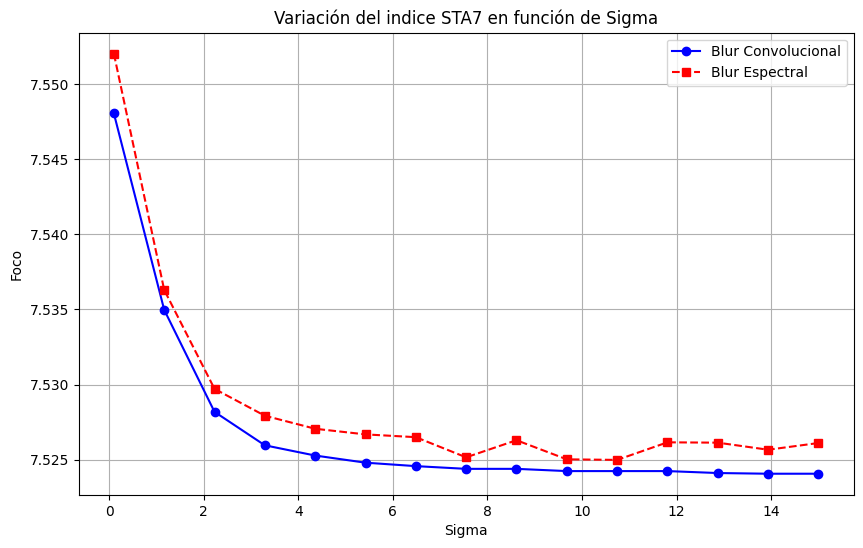

In [57]:
#Importamos la imagen
img = cv.imread('/content/drive/MyDrive/Computer Vision 1 UBA/TP2/Material/Rat.jpg',0)
h,w = img.shape

# Hacemos una lista de los valores de sigma a probar
sigmas = np.linspace(0.1, 15, 15)
k = 7
# Lista para almacenar los valores de Foco
sta_val_conv = []
sta_val_esp = []

#iteramos para cada sigma
for sigma in sigmas:

    # Aplicar filtro covolucional
    blur_conv = cv.GaussianBlur(img, (k,k), sigma)

    #Aplicamos el filtro espectral
    Kernel, KernelFFT = create_gauss_filter(h, w, k, sigma)
    img_fft = np.fft.fft2(img)
    filtered = img_fft * KernelFFT
    blur_espectral = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

    # Calcular el número FM para el blur convolucional
    sta_conv = sta7(blur_conv)
    sta_val_conv.append(sta_conv)

    # Calcular el número FM para el blur espectral
    sta_esp= sta7(blur_espectral)
    sta_val_esp.append(sta_esp)


# Crear la gráfica con Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(sigmas, sta_val_conv, label='Blur Convolucional', marker='o', linestyle='-', color='b')
plt.plot(sigmas, sta_val_esp, label='Blur Espectral', marker='s', linestyle='--', color='r')
plt.title('Variación del indice STA7 en función de Sigma')
plt.xlabel('Sigma')
plt.ylabel('Foco')
plt.legend()
plt.grid(True)
plt.show()

Podemos observar que coincidentemente con los visto en el metodo de FM para valores de blur mayores, menor es el valor de nuestro indice de calidad.
Se observan valores inversos a lo visto anteriormente ya que en este caso es el filtro convolucional el que disminuye en mayor medida su valor de entropia.

Observamos tambien que el filtro convolucional aparenta ser mas uniforme con sus resultados mientras que el filtro espectral por momentos presenta reducciones del indice de entropia que no concuerdan con la linea de tendencia.